# Example: Binary classification
--------------------------------

This example shows how to use ATOM to solve a binary classification problem. Additonnaly, we'll perform a variety of data cleaning steps to prepare the data for modelling.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  MelbourneAirport     18.0     26.9      21.4          7.0       8.9   
1          Adelaide     17.2     23.4       0.0          NaN       NaN   
2            Cairns     18.6     24.6       7.4          3.0       6.1   
3          Portland     13.6     16.8       4.2          1.2       0.0   
4           Walpole     16.4     19.9       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0         SSE           41.0          W        SSE  ...         95.0   
1           S           41.0          S        WSW  ...         59.0   
2         SSE           54.0        SSE         SE  ...         78.0   
3         ESE           39.0        ESE        ESE  ...         76.0   
4          SE           44.0         SE         SE  ...         78.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         54.0       1019.5       1017.0       8.0       5.0     18.5   
1         36.0       1015.7       1015.7       NaN       NaN     17.7   
2         57.0       1018.7       1016.6       3.0       3.0     20.8   
3         74.0       1021.4       1020.5       7.0       8.0     15.6   
4         70.0       1019.4       1018.9       NaN       NaN     17.4   

   Temp3pm  RainToday  RainTomorrow  
0     26.0        Yes             0  
1     21.9         No             0  
2     24.1        Yes             0  
3     16.0        Yes             1  
4     18.1         No             0  

[5 rows x 22 columns]

## Run the pipeline

In [3]:
# Call atom using only 5% of the complete dataset (for explanatory purposes)
atom = ATOMClassifier(X, "RainTomorrow", n_rows=0.05, n_jobs=8, verbose=2)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 8 cores.

Dataset stats ==================== >>
Shape: (7109, 22)
Memory: 3.08 MB
Scaled: False
Missing values: 15933 (10.2%)
Categorical features: 5 (23.8%)
-------------------------------------
Train set size: 5688
Test set size: 1421
-------------------------------------
|   |      dataset |        train |         test |
| - | ------------ | ------------ | ------------ |
| 0 |   5592 (3.7) |   4474 (3.7) |   1118 (3.7) |
| 1 |   1517 (1.0) |   1214 (1.0) |    303 (1.0) |



In [4]:
# Impute missing values
atom.impute(strat_num="median", strat_cat="drop", max_nan_rows=0.8)

Fitting Imputer...
Imputing missing values...
 --> Dropping 5 samples for containing more than 16 missing values.
 --> Imputing 17 missing values with median (12.0) in feature MinTemp.
 --> Imputing 13 missing values with median (22.6) in feature MaxTemp.
 --> Imputing 73 missing values with median (0.0) in feature Rainfall.
 --> Imputing 3068 missing values with median (4.8) in feature Evaporation.
 --> Imputing 3413 missing values with median (8.6) in feature Sunshine.
 --> Dropping 462 samples due to missing values in feature WindGustDir.
 --> Imputing 461 missing values with median (37.0) in feature WindGustSpeed.
 --> Dropping 469 samples due to missing values in feature WindDir9am.
 --> Dropping 185 samples due to missing values in feature WindDir3pm.
 --> Imputing 53 missing values with median (13.0) in feature WindSpeed9am.
 --> Imputing 128 missing values with median (17.0) in feature WindSpeed3pm.
 --> Imputing 89 missing values with median (70.0) in feature Humidity9am.
 -->

In [5]:
# Encode the categorical features
atom.encode(strategy="Target", max_onehot=10, rare_to_value=0.04)

Fitting Encoder...
Encoding categorical columns...
 --> Target-encoding feature Location. Contains 47 classes.
 --> Target-encoding feature WindGustDir. Contains 16 classes.
 --> Target-encoding feature WindDir9am. Contains 16 classes.
 --> Target-encoding feature WindDir3pm. Contains 16 classes.
 --> Ordinal-encoding feature RainToday. Contains 2 classes.


In [6]:
# Train an Extra-Trees and a Random Forest model
atom.run(models=["ET", "RF"], metric="f1", n_bootstrap=5)


Training ========================= >>
Models: ET, RF
Metric: f1


Results for ExtraTrees:
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.532
Time elapsed: 0.215s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.4959 ± 0.0125
Time elapsed: 1.003s
-------------------------------------------------
Total time: 1.218s


Results for RandomForest:
Fit ---------------------------------------------
Train evaluation --> f1: 0.9995
Test evaluation --> f1: 0.5235
Time elapsed: 0.283s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.5302 ± 0.0048
Time elapsed: 1.285s
-------------------------------------------------
Total time: 1.567s


Final results ==================== >>
Total time: 2.787s
-------------------------------------
ExtraTrees   --> f1: 0.4959 ± 0.0125 ~
RandomForest --> f1: 0.5302 ± 0.0048 ~ !


## Analyze the results

In [7]:
# Let's have a look at the final results
atom.results

score_train  score_test  time_fit  score_bootstrap  time_bootstrap  \
ET       1.0000      0.5320  0.215197         0.495895        1.002652   
RF       0.9995      0.5235  0.282572         0.530242        1.284799   

        time  
ET  1.217849  
RF  1.567371

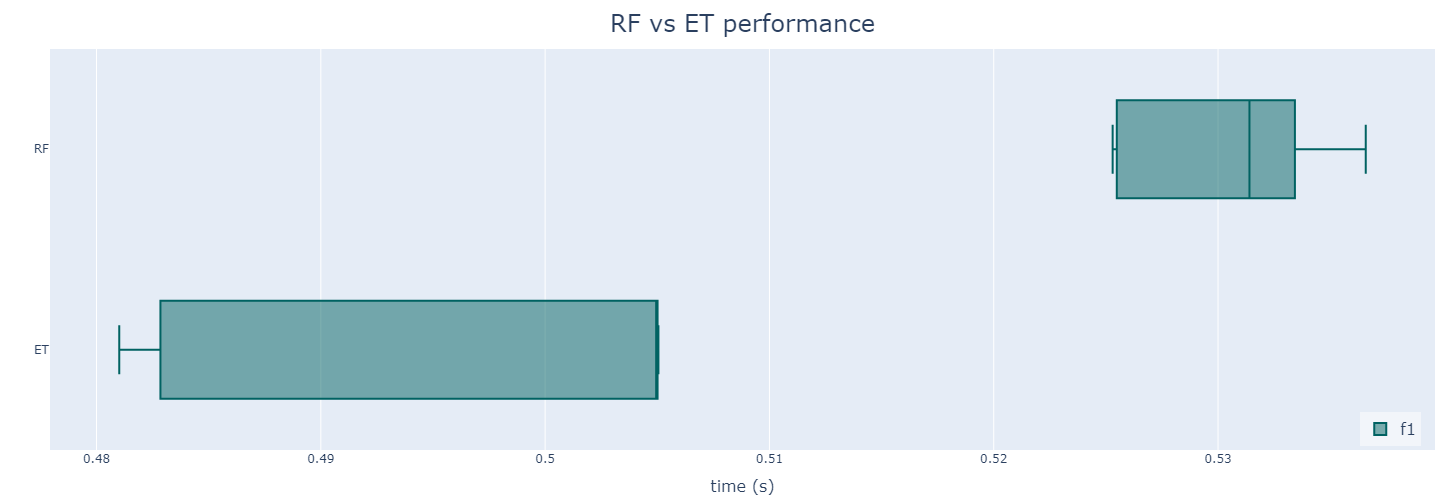

In [8]:
# Visualize the bootstrap results
atom.plot_results(title="RF vs ET performance")

In [9]:
# Print the results of some common metrics
atom.evaluate()

accuracy  average_precision  balanced_accuracy      f1  jaccard  \
ET    0.8476             0.6559             0.6878  0.5320   0.3624   
RF    0.8452             0.6729             0.6835  0.5235   0.3545   

    matthews_corrcoef  precision  recall  roc_auc  
ET             0.4789     0.7500  0.4122   0.8499  
RF             0.4692     0.7413  0.4046   0.8583

In [10]:
# The winner attribute calls the best model (atom.winner == atom.rf)
print(f"The winner is the {atom.winner.name} model!!")

The winner is the RF model!!


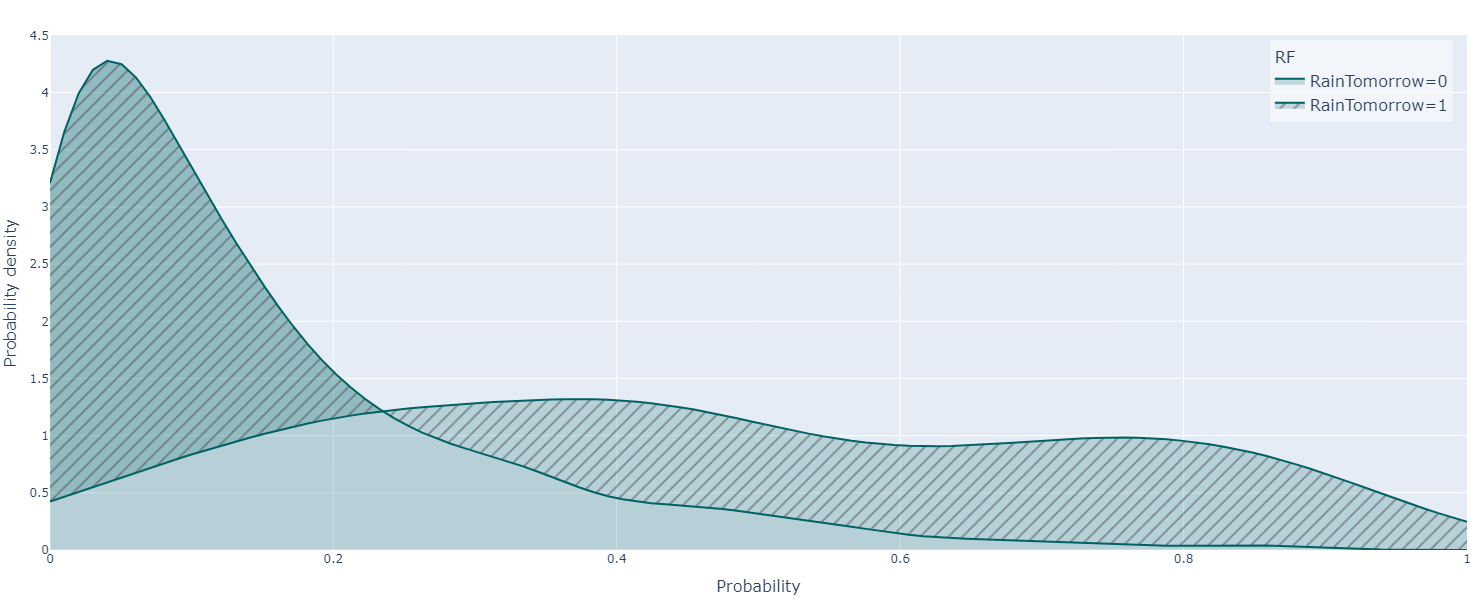

In [11]:
# Visualize the distribution of predicted probabilities
atom.winner.plot_probabilities()

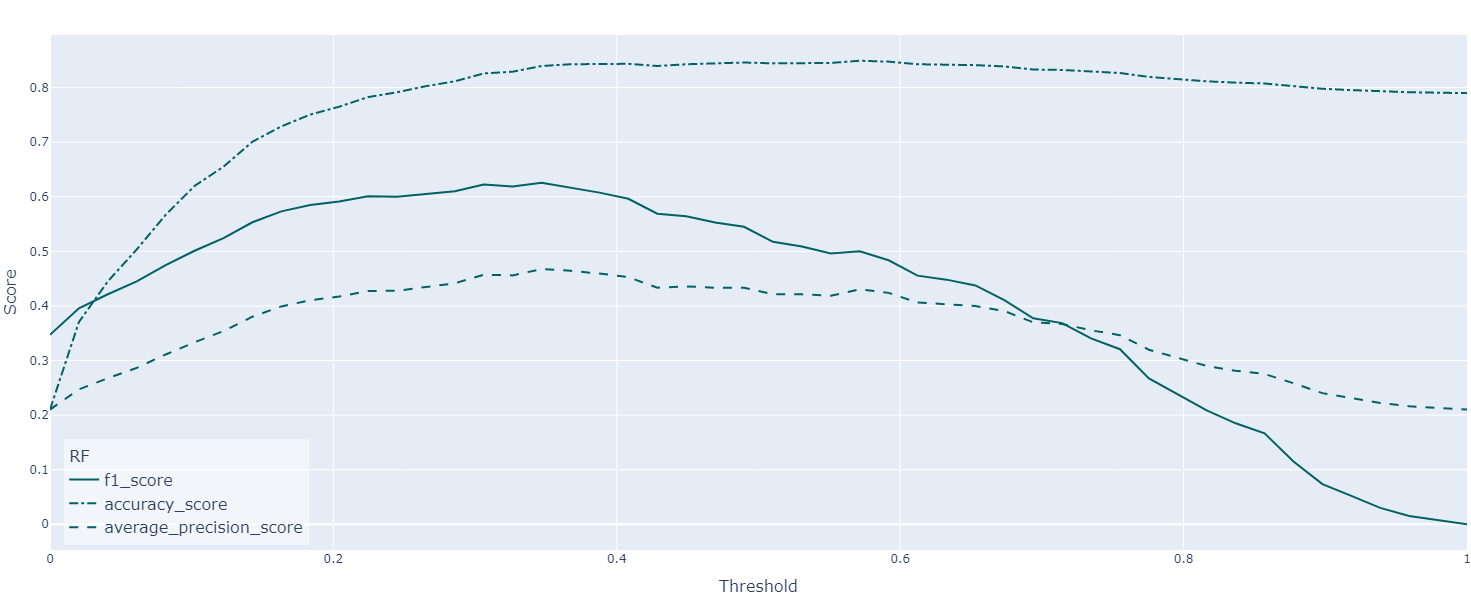

In [12]:
# Compare how different metrics perform for different thresholds
atom.winner.plot_threshold(metric=["f1", "accuracy", "ap"], steps=50)
